In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.gda as gda
import mltools.risks as risks

In [4]:
# mm = models.SigmaNeuronModel(funcs.ID(), 2, np.array([1.0,2.0,3.0]))
# X = np.random.random((5,2))
# print(X)

In [5]:
# print(mm.gradient(X))

In [6]:
# print(mm.gradient_x(X))

In [7]:
X, Y = datasets.load_iris(return_X_y=True)

In [8]:
# hinge_func = funcs.Hinge(1.0)
# loss_func = lossfuncs.MarginLoss(hinge_func)
# nnmod = models.SimpleNN(funcs.Sigmoidal(1.0), 4, 100)
# risk = risks.Risk(nnmod, loss_func)

# nnmod.param[:] = 2*np.random.random(nnmod.n_param)-1

In [9]:
# gd = gda.GradientDescent(risk, h=0.1)

In [10]:
# gd.fit(X, Y)
# plt.plot(gd.rvals)
# plt.show()

In [11]:
# accuracy_score(Y2, np.sign(nnmod.evaluate(X2)))

In [12]:
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing

In [13]:
pca = decomposition.PCA(2)
pca.fit(X)
U = pca.transform(X)

In [14]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]

In [15]:
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)

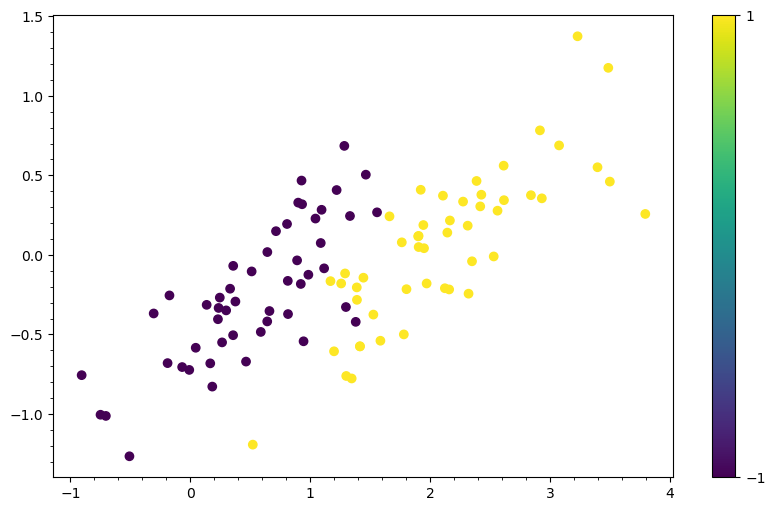

In [16]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U2[:,0], U2[:,1], c=Y2)
plt.colorbar(sc,ticks=[-1,+1])
plt.minorticks_on()
plt.show()

In [17]:
def calc_zz(mod, min_xval, max_xval, min_yval, max_yval):
    xrange = np.linspace(min_xval, max_xval, 150)
    yrange = np.linspace(min_yval, max_yval, 150)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

In [18]:
hinge_func2 = funcs.Hinge(1.0)
loss_func2 = lossfuncs.MarginLoss(hinge_func2)
nnmod2 = models.SimpleNN(funcs.Sigmoidal(7.0), 2, 30)
risk2 = risks.Risk(nnmod2, loss_func2)

nnmod2.param[:] = 2*np.random.random(nnmod2.n_param)-1

In [19]:
gd2 = gda.GradientDescent(risk2, h=0.05, tol=1.0e-8)

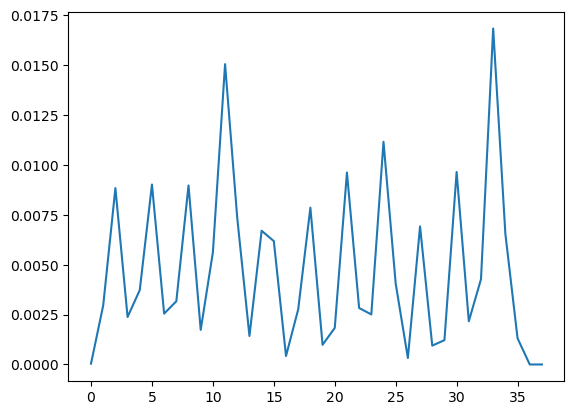

In [32]:
gd2.fit(U2, Y2)
plt.plot(gd2.rvals)
plt.show()

In [33]:
accuracy_score(Y2, np.sign(nnmod2.evaluate(U2)))

1.0

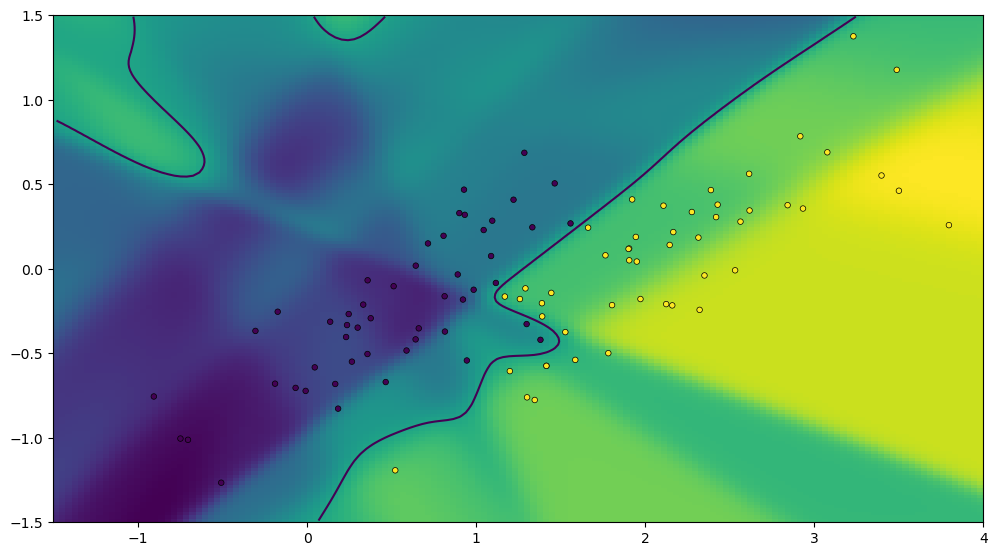

In [34]:
ZZ = calc_zz(nnmod2, -1.5, 4.0, -1.5, 1.5)
plt.figure(figsize=(12,8))
plt.scatter(U2[:,0], U2[:,1], c=Y2, s=16, edgecolors='k', linewidths=0.50)
plt.imshow(ZZ, origin='lower', extent=(-1.5, 4.0, -1.5, 1.5))
# plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ, levels=[0.], origin='lower', extent=(-1.5, 4.0, -1.5, 1.5))
plt.show()